In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display first few rows
df.head()

# Check for missing values
df.isnull().sum()

# Drop irrelevant columns
irrelevant_columns = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df_cleaned = df.drop(columns=irrelevant_columns)

# Convert categorical columns to numeric
df_cleaned['Attrition'] = df_cleaned['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df_cleaned['OverTime'] = df_cleaned['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode remaining categorical variables
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

# Display cleaned dataset
df_cleaned.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,92,2,1,3,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,40,3,1,2,...,False,True,False,False,False,False,False,False,True,False


In [7]:
# Convert the Attrition column to numeric (1 for "Yes", 0 for "No")
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Group by JobRole and Department to analyze attrition rate
attrition_by_role = df.groupby('JobRole')['Attrition'].mean()
attrition_by_dept = df.groupby('Department')['Attrition'].mean()

print("Attrition by Job Role:")
print(attrition_by_role)

print("\nAttrition by Department:")
print(attrition_by_dept)


Attrition by Job Role:
JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
Name: Attrition, dtype: float64

Attrition by Department:
Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: Attrition, dtype: float64


In [9]:
# Group by Gender and Department to analyze average Monthly Income
pay_by_gender = df.groupby(['Department', 'Gender'])['MonthlyIncome'].mean().unstack()
pay_by_gender

Gender,Female,Male
Department,,
Human Resources,7264.000000,6371.023256
Research & Development,6513.691293,6129.888316
Sales,6972.126984,6949.645914


In [11]:
# Analyze impact of Marital Status and Distance from Home on Work-Life Balance
work_life_balance_by_status = df.groupby('MaritalStatus')['WorkLifeBalance'].mean()
work_life_balance_by_distance = df.groupby('DistanceFromHome')['WorkLifeBalance'].mean()

print("Work-Life Balance by Marital Status:")
print(work_life_balance_by_status)

print("\nWork-Life Balance by Distance from Home:")
print(work_life_balance_by_distance)

Work-Life Balance by Marital Status:
MaritalStatus
Divorced    2.749235
Married     2.756315
Single      2.776596
Name: WorkLifeBalance, dtype: float64

Work-Life Balance by Distance from Home:
DistanceFromHome
1     2.745192
2     2.781991
3     2.821429
4     2.906250
5     2.769231
6     2.796610
7     2.678571
8     2.762500
9     2.717647
10    2.825581
11    3.000000
12    2.800000
13    2.578947
14    2.571429
15    2.730769
16    2.718750
17    2.600000
18    2.576923
19    2.909091
20    2.720000
21    2.666667
22    2.842105
23    2.814815
24    2.571429
25    2.720000
26    2.680000
27    2.500000
28    3.000000
29    2.740741
Name: WorkLifeBalance, dtype: float64


In [13]:
# Analyze relationship between Education and Job Satisfaction
education_vs_satisfaction = df.groupby('Education')['JobSatisfaction'].mean()
education_vs_satisfaction

Education
1    2.800000
2    2.769504
3    2.652098
4    2.786432
5    2.666667
Name: JobSatisfaction, dtype: float64

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate features and target variable
X = df_cleaned.drop(columns=['Attrition'])
y = df_cleaned['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Get feature importance from the trained Decision Tree model
importance = clf.feature_importances_

# Create a DataFrame of feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)
feature_importance_df.head(10)  # Display top 10 important features

Accuracy: 0.7551020408163265
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       255
           1       0.16      0.21      0.18        39

    accuracy                           0.76       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.76      0.77       294



,Feature,Importance
9,MonthlyIncome,0.144619
12,OverTime,0.078718
1,DailyRate,0.069126
5,HourlyRate,0.066566
0,Age,0.058217
22,YearsSinceLastPromotion,0.047981
10,MonthlyRate,0.045359
21,YearsInCurrentRole,0.039351
11,NumCompaniesWorked,0.036866
18,TrainingTimesLastYear,0.036267


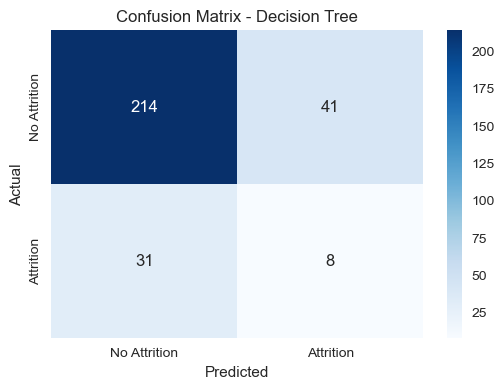

In [17]:
# Import necessary libraries for plotting and evaluation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


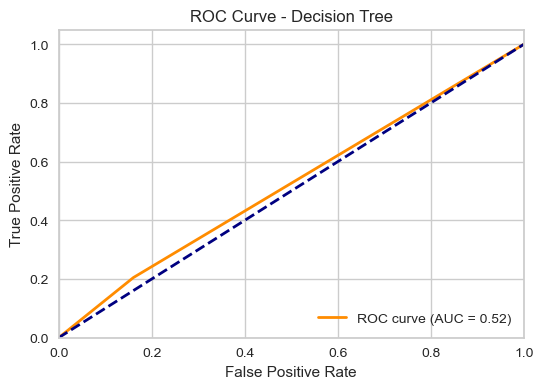

In [19]:
from sklearn.metrics import roc_curve, auc

# Generate ROC curve values
y_prob = clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


In [21]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering and calculate silhouette scores
silhouette_scores = {}
for n_clusters in range(2, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg

# Display silhouette scores
silhouette_scores


{2: 0.08654342643917012,
 3: 0.09670362405428101,
 4: 0.10457384091764556,
 5: 0.09249396002423539,
 6: 0.10607634178653332}

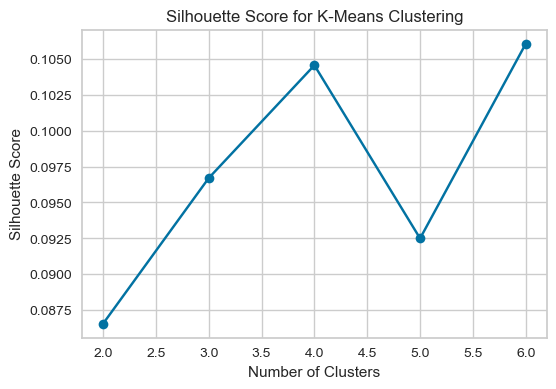

In [23]:
# Import necessary libraries for clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of clusters
cluster_range = range(2, 7)
silhouette_scores = []

# Calculate silhouette score for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different cluster configurations
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.show()


Cluster 0: (820, 2)


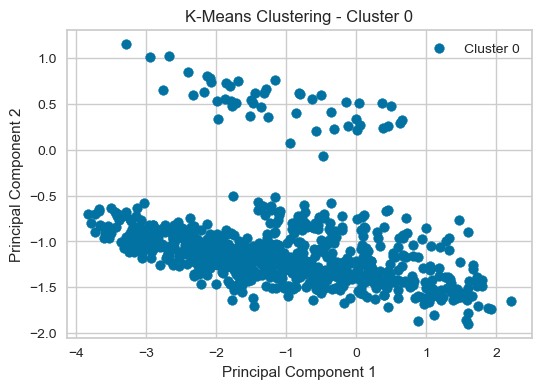

Cluster 1: (399, 2)


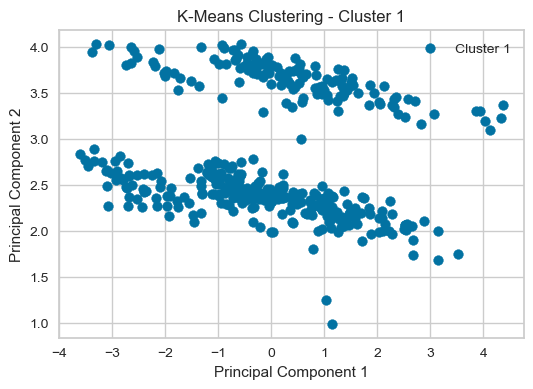

Cluster 2: (251, 2)


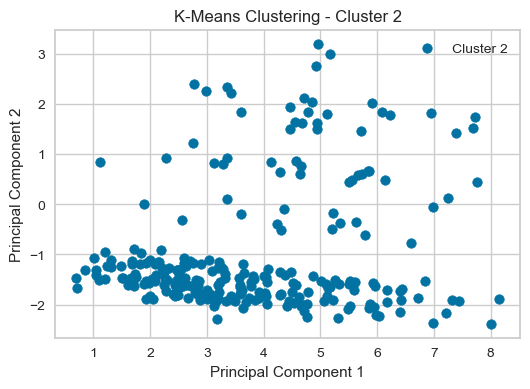

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Assuming X_scaled is your standardized feature data

# Step 2: Apply KMeans clustering
num_clusters = 3  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 3: Visualize each cluster separately in individual plots
for i in range(num_clusters):
    # Slice the points belonging to cluster i
    cluster = X_pca[y_kmeans == i]  
    
    # Print the shape (number of points in the cluster)
    print(f"Cluster {i}: {cluster.shape}")
    
    # Create a new plot for each cluster
    plt.figure(figsize=(6, 4))
    
    # Plot the points in this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}', c='b')
    
    # General plot settings
    plt.title(f"K-Means Clustering - Cluster {i}")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.show()


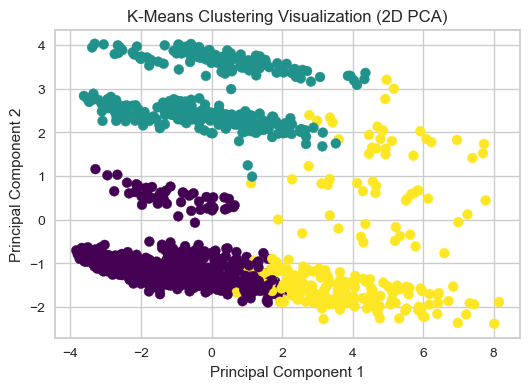

In [27]:
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering with the best number of clusters (e.g., 3)
best_kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = best_kmeans.fit_predict(X_scaled)

# Plot the clusters in 2D space
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [29]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(kmeans.cluster_centers_)

[[-2.11061321e-01 -2.55252512e-03 -1.78529567e-03 -5.19322271e-02
   2.13718518e-02  1.32168523e-02  2.82124126e-02 -5.01922466e-01
  -1.58023238e-03 -4.93822583e-01 -3.15094130e-02 -3.48795215e-02
  -1.63911409e-02  2.43957849e-02  2.34366709e-02 -1.17435231e-03
   5.75606103e-03 -3.60338651e-01 -1.74502645e-02 -4.52486423e-02
  -2.79108378e-01 -2.18853463e-01 -2.22585857e-01 -1.83585882e-01
   1.08616550e-02 -1.29196120e-02  5.99614989e-01 -6.59959753e-01
   8.66107066e-02 -3.48254884e-01  8.44106960e-02  5.45112110e-02
   2.28953944e-02  5.97436523e-02  1.38593315e-01  3.60185276e-01
  -2.68260235e-01  1.59978659e-01 -2.39904058e-01  3.91599008e-01
  -5.33821164e-01 -2.44624987e-01 -2.79409656e-02  1.52268820e-02]
 [-1.94194261e-01 -6.03186077e-03  2.41796144e-02 -6.29476371e-04
  -3.89588259e-02 -3.43547106e-02 -4.66599580e-02 -2.60788138e-02
   3.93283799e-02 -1.25566675e-01  3.10643874e-02 -9.19197027e-02
   1.71685327e-02 -3.05517462e-02 -5.79688702e-02 -4.91256578e-02
  -1.9881

In [31]:
from sklearn.preprocessing import StandardScaler

# Assuming df_cleaned is your cleaned dataset without the target column
X = df_cleaned.drop(columns=['Attrition'])  # Make sure to exclude the target variable if it's present

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Now X_scaled is defined


Silhouette Score: 0.097


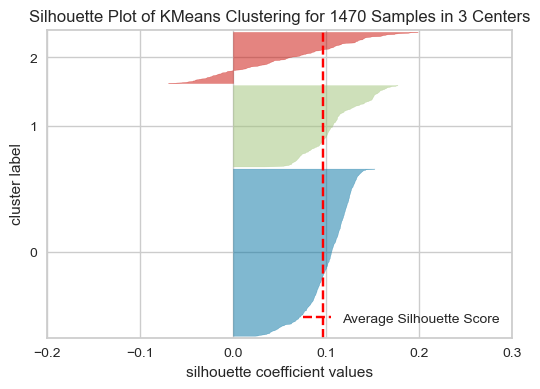

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1470 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X_scaled is your standardized feature data
num_clusters = 3  # You can adjust this based on your findings

# Step 1: Apply KMeans clustering
model = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = model.fit_predict(X_scaled)

# Step 2: Calculate silhouette score
score = silhouette_score(X_scaled, cluster_labels, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# Step 3: Visualize silhouette scores for all points
plt.figure(figsize=(6, 4))
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled)  # Fit the visualizer with the feature data
visualizer.show()


In [41]:
# Check the number of features the model was trained on
print(f"Number of features in the training data: {X.shape[1]}")


Number of features in the training data: 44


In [53]:
feature_names = X.columns  # Get the feature names from the original training data

# Create new_data as a DataFrame, ensuring it has the correct feature names
new_data = pd.DataFrame([[35, 1000, 5, 3, 4, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1]],
                     columns=feature_names)  # Ensure the correct number of features

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict the cluster for the new data
predicted_cluster = kmeans_model.predict(new_data_scaled)

# Output the predicted cluster
print(f"The new data belongs to cluster: {predicted_cluster[0]}")


The new data belongs to cluster: 0
